In [1]:
import json
import matplotlib.pyplot as plt

# Define file paths
multiturn_file_path = './trainer_log_delta_K50.jsonl'
singleturn_file_path = './trainer_log_delta_K50.jsonl'

# Function to read data from a JSONL file
def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [json.loads(line) for line in lines]

# Read data from files
multiturn_data = read_jsonl(multiturn_file_path)
singleturn_data = read_jsonl(singleturn_file_path)

In [2]:
multiturn_data

[{'current_steps': 10,
  'total_steps': 6485,
  'loss': 1.4313,
  'learning_rate': 9.99994132961422e-06,
  'epoch': 0.0015419308829481718,
  'percentage': 0.15,
  'elapsed_time': '0:00:29',
  'remaining_time': '5:19:33',
  'throughput': '0.00',
  'total_tokens': 0},
 {'current_steps': 20,
  'total_steps': 6485,
  'loss': 1.424,
  'learning_rate': 9.999765319833765e-06,
  'epoch': 0.0030838617658963435,
  'percentage': 0.31,
  'elapsed_time': '0:00:59',
  'remaining_time': '5:21:41',
  'throughput': '0.00',
  'total_tokens': 0},
 {'current_steps': 20,
  'total_steps': 6485,
  'eval_loss': 1.427915334701538,
  'epoch': 0.0030838617658963435,
  'percentage': 0.31,
  'elapsed_time': '0:01:10',
  'remaining_time': '6:20:16',
  'throughput': '0.00',
  'total_tokens': 0},
 {'current_steps': 30,
  'total_steps': 6485,
  'loss': 1.4347,
  'learning_rate': 9.999471974789262e-06,
  'epoch': 0.0046257926488445155,
  'percentage': 0.46,
  'elapsed_time': '0:01:39',
  'remaining_time': '5:55:25',
  

In [3]:
for entry in multiturn_data:
    print('loss' in entry)

True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True
True
False
True


In [4]:
def extract_loss_data(data):
    steps = []
    eval_steps = []
    training_loss = []
    evaluation_loss = []
    for entry in data:
        current_step = entry['current_steps']
        if 'loss' in entry:
            steps.append(current_step)
            training_loss.append(entry['loss'])
        if 'eval_loss' in entry:
            eval_steps.append(current_step)
            evaluation_loss.append(entry['eval_loss'])
    return steps, eval_steps, training_loss, evaluation_loss

In [5]:
multiturn_steps, multiturn_eval_steps, multiturn_training_loss, multiturn_evaluation_loss = extract_loss_data(multiturn_data)

singleturn_steps, singleturn_eval_steps, singleturn_training_loss, singleturn_evaluation_loss = extract_loss_data(singleturn_data)


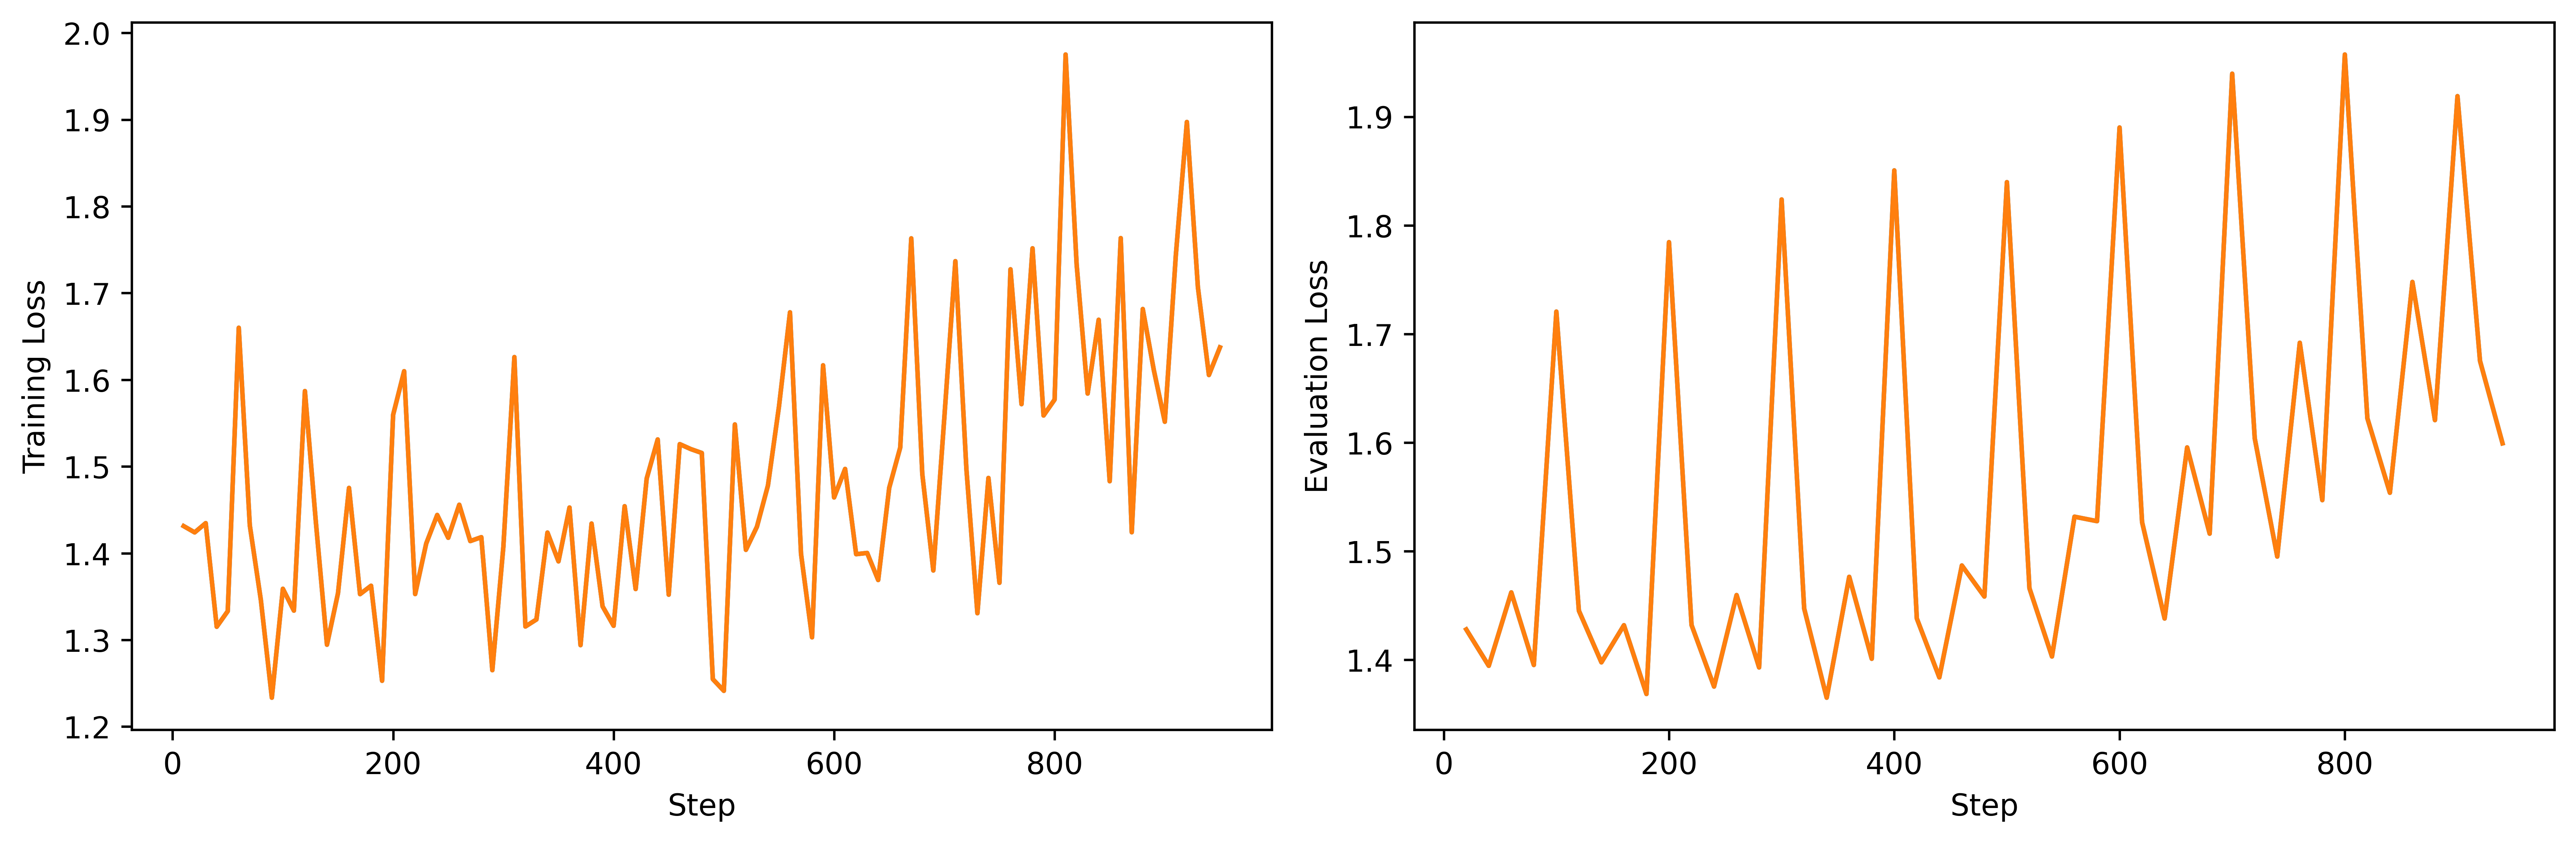

In [6]:
plt.figure(figsize=(12, 4), dpi=600)

# Bilingual Monolingual

# Subplot for training loss
plt.subplot(1, 2, 1)
plt.plot(multiturn_steps, multiturn_training_loss, label='Multiturn Training Loss')
plt.plot(singleturn_steps, singleturn_training_loss, label='Singleturn Training Loss')
plt.xlabel('Step')
plt.ylabel('Training Loss')
# plt.title('Comparison of Training Loss: Multiturn vs Singleturn')
# plt.legend()
# plt.grid(True)

# Subplot for evaluation loss
plt.subplot(1, 2, 2)
plt.plot(multiturn_eval_steps, multiturn_evaluation_loss, label='Multiturn Evaluation Loss')
plt.plot(singleturn_eval_steps, singleturn_evaluation_loss, label='Singleturn Evaluation Loss')
plt.xlabel('Step')
plt.ylabel('Evaluation Loss')
# plt.title('Comparison of Evaluation Loss: Multiturn vs Singleturn')
# plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()